# U.S. Medical Insurance Costs

import pandas as pd

In [ ]:
Using over 1,300 samples, we are going to determine the effect of individual BMI on a Insurance Costs.

In [23]:
import pandas as pd
#! pip install --user pandas
import matplotlib.pyplot as plt
#! pip install --user matplotlib
import csv
import numpy as np
#! pip install --user numpy

To start we are going to import a .csv file that has data on age, sex, bmi, children, if they smoke, region they live in, and how much their insurance charges

We are going to create a data frame using Pandas.

In [7]:
df = pd.read_csv('insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We are going to create lists for each variable and store the data in them.

Since we are only determined to find the BMI vs. Insurance cost, we are only going to extract those variables.

In [19]:
bmi = pd.DataFrame(df, columns = ['bmi'])
charges = pd.DataFrame(df, columns = ['charges'])
display(bmi)
display(charges)

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


Now lets use Matplotlib to generate a graph that allows us to grabe an idea of what kind of trend/data we are working with

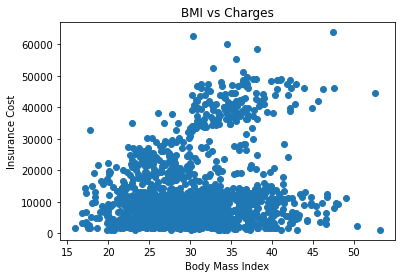

In [29]:
plt.scatter(bmi, charges)
plt.xlabel('Body Mass Index')
plt.ylabel('Insurance Cost')
plt.title("BMI vs Charges")
plt.show()

Looking at this scatter plot, we can see that there is not an important trend that shows us if insurance cost is dependent on the BMI. So lets plot it vs. other variables.

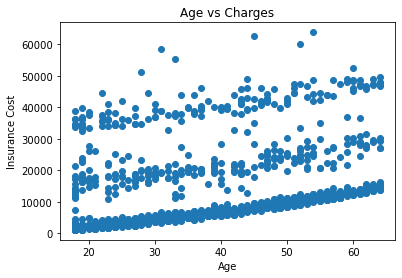

In [30]:
age = pd.DataFrame(df, columns = ['age'])
plt.close()
plt.scatter(age, charges)
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.title("Age vs Charges")
plt.show()

Okay now we can see a general trend that the older you are the slightly more your insurance cost will be. This is pretty obvious, however as we can observe, our graph gives us 3 similarly patterend trends. Lets now add the smoking variable into this graph. we are going to plot the same variables however, we are going to highlight the smokers red.

In [60]:
smoker = pd.DataFrame(df, columns = ['smoker'])
smoker

,smoker
0,yes
1,no
2,no
3,no
4,no
...,...
1333,no
1334,no
1335,no
1336,no


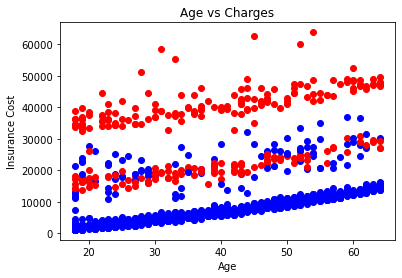

In [87]:
smoker = df['smoker'].tolist()
age = df['age'].tolist()
charges = df['charges'].tolist()
plt.close()
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.title("Age vs Charges")
for i in range(len(smoker)):
    if smoker[i] == "yes":
        plt.scatter(age[i], charges[i], c='red')
    else:
        plt.scatter(age[i], charges[i], c='blue')
plt.show()

Now we can see even a better trend. Clearly the smokers are paying way more for insurance.

Lets generate 2 more plots before we wrap up this analyst.

No handles with labels found to put in legend.


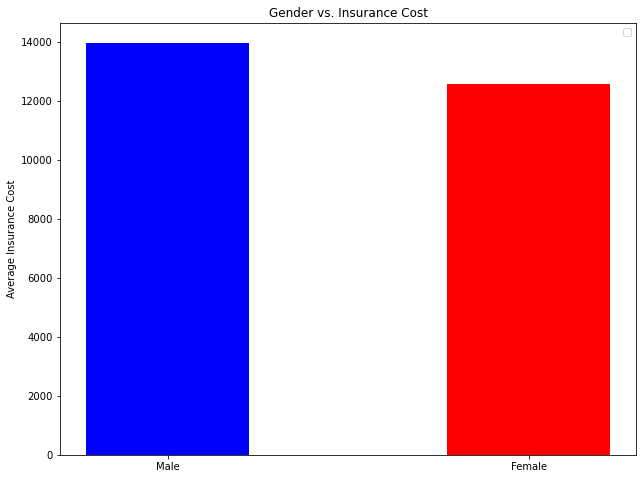

In [150]:
males = []
females = []
sex = df['sex'].tolist()
for i in range(len(sex)):
    if sex[i] == "male":
        males.append(charges[i])
    else:
        females.append(charges[i])
male_average = np.mean(males)
female_average = np.mean(females)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Male', 'Female']
ax.bar(labels,[male_average, female_average], color = ['blue','red'], width=0.45)
ax.set_ylabel('Average Insurance Cost')
ax.set_title('Gender vs. Insurance Cost')
ax.legend()
plt.show()

We see that men pay on average more than females, now lets take into consideration, the men and women with kids.

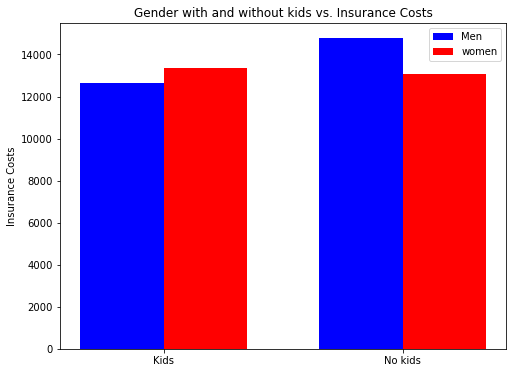

In [152]:
males.clear()
females.clear()
males_kids = []
females_kids = []
sex = df['sex'].tolist()
kids = df['children'].tolist()
for i in range(len(sex)):
    if sex[i] == "male" and kids[i] > 0:
        males_kids.append(charges[i])
    else:
        males.append(charges[i])
    if sex[i] == "female" and kids[i] > 0:
        females_kids.append(charges[i])
    else:
        females.append(charges[i])
male_average = np.mean(males)
female_average = np.mean(females)
male_average_kids = np.mean(males_kids)
female_average_kids = np.mean(females_kids)

male_mean =[male_average, male_average_kids]
female_mean = [female_average, female_average_kids]


labels = ['Kids','No kids']
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.35/2, male_mean, 0.35, label='Men', color='blue')
rects2 = ax.bar(x+0.35/2, female_mean, 0.35, label='women', color='red')
ax.set_ylabel('Insurance Costs')
ax.set_title('Gender with and without kids vs. Insurance Costs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


We now can conclude that women with kids pay more insurance than men, and men without kids pay more insurance than women. No crazy results to take from these variables, however defintely mention worthy.